In [29]:
import numpy as np
import tensorflow as tf
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

def preprocess(image_path):
    Image = image.load_img(image_path,target_size=(224,224))
    i = image.img_to_array(Image)
    i = preprocess_input(i) 
    input_arr = np.array([i])
    return input_arr

def predict(path):
    model = tf.keras.models.load_model(r'C:\Users\AL-MASA\Desktop\GitHub_Models\Model2\model.h5')
    predictions = model.predict(preprocess(path))
    predicted_class = np.argmax(predictions)
    confidence = np.max(predictions)
    disease_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
    predicted_disease = disease_names[predicted_class]

     # Display the image
    img_cv2 = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')

    # Print the result
    if confidence < 0.6:
        return print("Unknown disease")
    else:
       return print(f"Predicted Disease: {predicted_disease} with {confidence:.2f} confidence")
    
    plt.show()

    #return predicted_disease, confidence


1/1 [==============================] - 0s 78ms/step
Predicted Disease: normal with 1.00 confidence


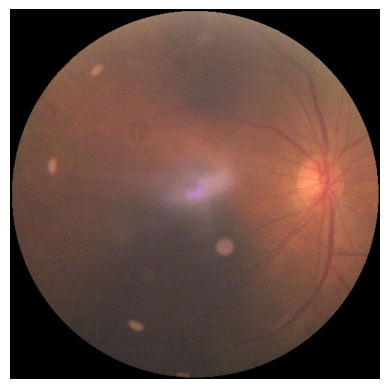

In [33]:
predict(r'C:\Users\AL-MASA\Desktop\Graduation_Project\Eye_Disease_Model\GraduationProject\Eye_disease_dataset\normal\2332_right.jpg')

In [7]:
import numpy as np
import tensorflow as tf
import os
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image

def preprocess(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return np.array([img_array])

def predict_images(folder_path, num_images=100):
    model = tf.keras.models.load_model('C:\\Users\\AL-MASA\\Desktop\\GitHub_Models\\Model2\\model.h5')
    disease_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
    predictions = {}
    
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    image_files = image_files[:num_images]  # Limit to specified number of images
    
    for img_path in image_files:
        img_array = preprocess(img_path)
        pred = model.predict(img_array)
        predicted_class = np.argmax(pred)
        predictions[img_path] = disease_names[predicted_class]
    
    return predictions


In [12]:
predict_images(r'C:\Users\AL-MASA\Desktop\Graduation_Project\Eye_Disease_Model\GraduationProject\Eye_disease_dataset\normal', num_images=50)

1/1 [==============================] - 0s 25ms/step


{'C:\\Users\\AL-MASA\\Desktop\\Graduation_Project\\Eye_Disease_Model\\GraduationProject\\Eye_disease_dataset\\normal\\1034_left.jpg': 'normal',
 'C:\\Users\\AL-MASA\\Desktop\\Graduation_Project\\Eye_Disease_Model\\GraduationProject\\Eye_disease_dataset\\normal\\1034_right.jpg': 'normal',
 'C:\\Users\\AL-MASA\\Desktop\\Graduation_Project\\Eye_Disease_Model\\GraduationProject\\Eye_disease_dataset\\normal\\1060_left.jpg': 'normal',
 'C:\\Users\\AL-MASA\\Desktop\\Graduation_Project\\Eye_Disease_Model\\GraduationProject\\Eye_disease_dataset\\normal\\1060_right.jpg': 'normal',
 'C:\\Users\\AL-MASA\\Desktop\\Graduation_Project\\Eye_Disease_Model\\GraduationProject\\Eye_disease_dataset\\normal\\1253_left.jpg': 'normal',
 'C:\\Users\\AL-MASA\\Desktop\\Graduation_Project\\Eye_Disease_Model\\GraduationProject\\Eye_disease_dataset\\normal\\1253_right.jpg': 'normal',
 'C:\\Users\\AL-MASA\\Desktop\\Graduation_Project\\Eye_Disease_Model\\GraduationProject\\Eye_disease_dataset\\normal\\2329_left.jpg':